# Pymaceuticals Inc.
---
## Module 5 Challenge - UNCC-VIRT-DATA-PT-03-2024-U-LOLC-MTTH
#### Joshua Moe

### Analysis (WORKING COPY)

- From my analysis, I have determined three findings.
- 1) The drug "Capomulin" had the largest test group among the treatment options for the mice, as seen in the bar plots. 
- 2) The drug "Capomulin" proves to successfully reduce tumor volume around the three week mark of treatment, as seen in line plot for mouse "l509".
- 3) As seen the scatter plot of "Average Tumor Volume vs. Mouse weight for the Capomulin regimen", there is a positive correlation between weight and tumor volume, where larger mice tend to have larger tumors (correlation coef, of ~0.84).

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
main_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
main_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice. # 249
len(main_df["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. # --> array(['g989'], dtype=object)
duplicate_mice_id = main_df.loc[main_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = main_df.loc[main_df["Mouse ID"] == duplicate_mice_id[0]]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = main_df[main_df["Mouse ID"].isin(duplicate_mice_id) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame. # 248
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

Mean_Tumor_Volume = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].mean().rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume"})
Median_Tumor_Volume = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].median().rename(columns={"Tumor Volume (mm3)":"Median Tumor Volume"})
Var_Tumor_Volume = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].var().rename(columns={"Tumor Volume (mm3)":"Tumor Volume Variance"})
Std_Tumor_Volume = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].std().rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Dev."})
Sem_Tumor_Volume = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].sem().rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Err."})

# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.concat([Mean_Tumor_Volume,Median_Tumor_Volume,Var_Tumor_Volume,Std_Tumor_Volume,Sem_Tumor_Volume],
                      axis=1)

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df_02 = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].aggregate(["mean","median","var","std","sem"])
summary_df_02

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

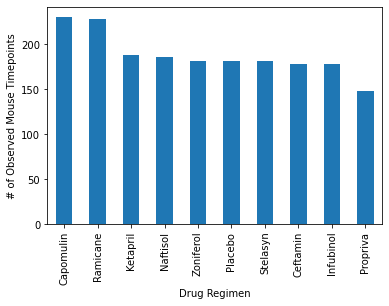

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_df.groupby("Drug Regimen")[["Sex"]].count().sort_values(by=['Sex'], ascending=False).plot.bar(legend=False, ylabel="# of Observed Mouse Timepoints")

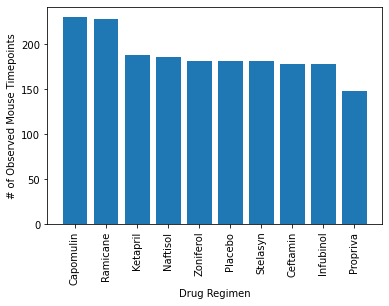

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x = clean_df["Drug Regimen"].value_counts().index.to_list()
y = clean_df["Drug Regimen"].value_counts().to_list()
plt.bar(x, y)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='Sex'>

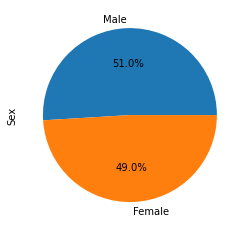

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_df = pd.DataFrame(
    {"Sex":clean_df["Sex"].value_counts().to_list()},
    index=clean_df["Sex"].value_counts().index.to_list()
)
pie_df.plot.pie(y="Sex", legend=False, autopct='%1.1f%%')

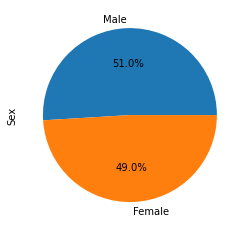

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(clean_df["Sex"].value_counts().to_list(),
    labels=clean_df["Sex"].value_counts().index.to_list(),
    autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxTime = clean_df.groupby("Mouse ID")["Timepoint"].max()
maxTime = maxTime.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
boxplot_merged_mouse_df = maxTime.merge(clean_df, how="left", on=["Mouse ID","Timepoint"])
boxplot_merged_mouse_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
#treatments = boxplot_merged_mouse_df["Drug Regimen"].unique()
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
empty_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset_data = boxplot_merged_mouse_df.loc[boxplot_merged_mouse_df["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    #print(len(subset_data))
    # add subset 
    empty_list.append(subset_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = subset_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = subset_data.loc[(subset_data < lower_bound) | (subset_data > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


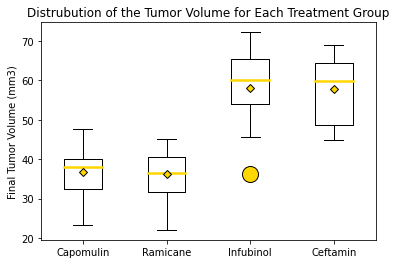

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='gold', markersize=16, markeredgecolor='black')
medianprops = dict(linestyle='-', linewidth=2.5, color='gold')
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor='gold')

plt.boxplot(empty_list,labels=treatments,flierprops=flierprops,medianprops=medianprops,meanprops=meanpointprops,showmeans=True)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distrubution of the Tumor Volume for Each Treatment Group')
plt.show()

## Line and Scatter Plots

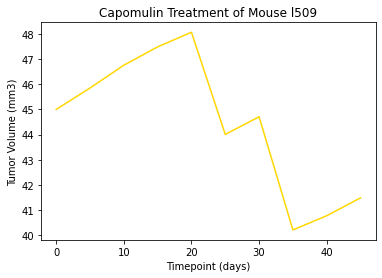

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_DF = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
I509Data = Capomulin_DF.loc[Capomulin_DF["Mouse ID"]=="l509"]
#I509Data

plt.plot(I509Data["Timepoint"], I509Data["Tumor Volume (mm3)"], color='gold')
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

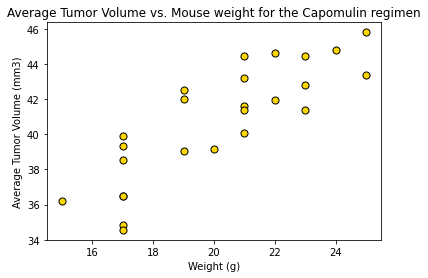

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
CapomulinAverageDF = Capomulin_DF.groupby("Mouse ID").mean()
plt.scatter(
    CapomulinAverageDF["Weight (g)"],
    CapomulinAverageDF["Tumor Volume (mm3)"],
    facecolor = 'gold',
    edgecolor = 'black',
    s=50
)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse weight for the Capomulin regimen")

plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume: 0.8419363424694717


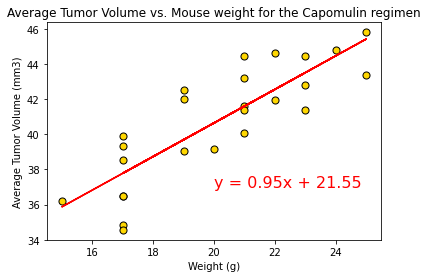

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

corr = st.pearsonr(CapomulinAverageDF["Weight (g)"], CapomulinAverageDF['Tumor Volume (mm3)'])[0]
print(f"The correlation coefficient between mouse weight and tumor volume: {corr}")

x_val = CapomulinAverageDF["Weight (g)"]
y_val = CapomulinAverageDF["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)

regressValue = x_val * slope + intercept
lineRQ = f"y = {slope:.2f}x + {intercept:.2f}"


plt.scatter(
    x_val,
    y_val,
    facecolor = 'gold',
    edgecolor = 'black',
    s=50
)

plt.plot(x_val, regressValue, "r-")
plt.annotate(lineRQ, (20,37), fontsize=16, color='red')

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse weight for the Capomulin regimen")

plt.show()